# Wrangle and Analyse ‚Äì WeRateDogs Data

## Table of Contents
- [1. Introduction](#intro)
- [2. Gathering data](#gathering)
- [3. Assessing data](#assessing)
- [4. Issues summary](#issues)
- [5. Cleaning data](#cleaning)
    - [5.1. Tidiness issues ‚Äí pt. 1](#tidiness1)
    - [5.2. Quality issues](#quality)
    - [5.3. Tidiness issues ‚Äí pt. 2](#tidiness2)
- [6. Storing, Analyzing and Visualizing Data](#storing)
- [7. References](#references)

<a id='intro'></a>
## 1. Introduction
This project was written for Udacity‚Äôs Data Analyst nanodegree program. The primary goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. This dataset is the tweet archive (from November 2015 to August 2017) of Twitter user @dog_rates, also known as WeRateDogs, which is an account that rates people's dogs with a fun comment about each pet.

They also deal with this rating system in a humorous way. Even though the rates should be from 1 to 10, they almost always have a denominator of 10, but numerators greater than 10 (e.g., 11/10 or 13/10). That happens because they believe that all dogs deserve at least a 10 and sometimes even more. For each tweet, there is a picture of a dog that is going to be rated. 
To analyze the WeRateDogs archive, data will be gathered from a variety of sources and in a variety of formats, assessed in its quality and tidiness, then cleaned. This whole process is called data wrangling.

There were 3 main sources of data:

**1) WeRateDogs Twitter archive (.csv)**: Udacity provided this file, which was downloaded manually from their website (twitter_archive_enhanced.csv). This dataset contains basic tweet data for all 5000+ of WeRateDogs tweets that were extracted programmatically. Udacity also used the column with each tweet's text to extract rating, dog name, and dog "stage" (i.e., doggo, floofer, pupper, and puppo) to "enhance" this Twitter archive." Out of the 5000+ tweets, they selected only those tweets with ratings (there are 2356).

**2) Twitter API and JSON data**: additional data from the WeRateDogs archive was gathered using the Twitter API ‚Äí in special, data about retweet counts and favorite (‚Äúlike‚Äù) counts. Using the tweet IDs in the original dataset, the Twitter API was queried for each tweet's JSON data through python's tweepy library. Then, each tweet's set of JSON data was written in a ‚Äú.txt‚Äù file (‚Äútweet_json.txt‚Äù), with each tweet's JSON data on its own line. At last, this .txt file was read, line by line, to create a pandas DataFrame.

**3) Tweet image prediction (.tsv)**: this file (image_predictions.tsv) was also provided by Udacity. They ran every image from the WeRateDogs tweets in the archive through a neural network that was able to classify breeds of dogs. This resulted in a table full of image predictions alongside each tweet ID and image URL. The table also provides columns informing: i) how confident the algorithm is in every prediction; ii) whether or not the prediction is a breed of dog (i.e., true or false); iii) and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images). The ‚Äúimage_predictions.tsv‚Äù file was hosted on Udacity's servers and was downloaded programmatically using the Requests library from the following URL:
https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


<a id='gathering'></a>
## 2. Gathering data

In [1]:
#imports required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%config InlineBackend.figure_format = 'svg'
#sets the maximum number of rows and columns to display to unlimited
pd.set_option("display.max_rows", None, "display.max_columns", None)

### 2.1. WeRateDogs Twitter archive (.csv)

In [2]:
#loads the ".csv" file into a dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### 2.2. Twitter API and JSON data

In [3]:
#declares twitter api keys and access tokens
consumer_key = 'MY CONSUMER KEY'
consumer_secret = 'MY CONSUMER SECRET'
access_token = 'MY ACCESS TOKEN'
access_secret = 'MY ACCESS SECRET'

In [21]:
#oauth authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [22]:
#creates a list to append each tweet data
tweets_list = []
#creates a list to append tweets that can't be found
fails_list = []
start_time = timer()
#queries twitter's api for json data for each tweet id in the weratedogs archive
for tweet_id in twitter_archive['tweet_id']:   
    try:
        tweets_list.append(api.get_status(tweet_id))
    except Exception as e:
        fails_list.append(tweet_id)
        print('No tweet found for ID: {}. Error message: {}'.format(str(tweet_id), str(e)))
end_time = timer()
print('This process was concluded in {:.2f} minutes'.format((end_time - start_time) / 60))

No tweet found for ID: 888202515573088257. Error message: [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for ID: 873697596434513921. Error message: [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for ID: 872668790621863937. Error message: [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for ID: 872261713294495745. Error message: [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for ID: 869988702071779329. Error message: [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for ID: 866816280283807744. Error message: [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for ID: 861769973181624320. Error message: [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for ID: 856602993587888130. Error message: [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for ID: 856330835276025856. Error message

Rate limit reached. Sleeping for: 116


No tweet found for ID: 695816827381944320. Error message: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
No tweet found for ID: 680055455951884288. Error message: [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for ID: 679475951516934144. Error message: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
No tweet found for ID: 675822767435051008. Error message: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=675822767435051008 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001F2B5F625E0>: Failed to establish a new connection: [WinError 10060] Uma tentativa de conex√£o falhou porque o componente conectado n√£o respondeu\r\ncorretamente ap√≥s um per√≠odo de tempo ou a conex√£o estabelecida falhou\r\nporque o host c

Rate limit reached. Sleeping for: 204


No tweet found for ID: 666058600524156928. Error message: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
This process was concluded in 39.24 minutes


In [30]:
#checks the length of each list
print('Length of tweets_list', len(tweets_list))
print('Length of fails_list', len(fails_list))

Length of tweets_list 2320
Length of fails_list 36


In [32]:
#checks the tweepy status object given by the api
print(tweets_list[1])

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017', 'id': 892177421306343426, 'id_str': '892177421306343426', 'text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boop‚Ä¶ https://t.co/aQFSeaCu9L", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/aQFSeaCu9L', 'expanded_url': 'https://twitter.com/i/web/status/892177421306343426', 'display_url': 'twitter.com/i/web/status/8‚Ä¶', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs¬Æ', 'screen_name': 'dog_rates', 'location': 'all our links ‚ûú', 'description': 'Your Only Source For Professional Dog Ratings Instagram a

In [33]:
#writes this list into a ".txt" file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweets_list, indent=4))

In [ ]:
#creates a DataFrame from the tweet_json.txt file with interesting information from the JSON dictionaries
info_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        info_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                             'url': url,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(info_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                        'created_at', 'retweeted_status', 'url'])

In [61]:
#writes dataframe to the ".csv" file 
tweet_json.to_csv('tweet_json.txt', encoding='utf-8', index=False)

In [3]:
#loads the ".csv" file into a dataframe
tweet_json = pd.read_csv('tweet_json.txt')

### 2.3. Tweet image prediction (.tsv)

In [5]:
#imports the data from the server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [6]:
#saves the data as a "".tsv" file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [7]:
#reads the ".tsv" file
img_pred = pd.read_table('image-predictions.tsv')

<a id='assessing'></a>
## 3. Assessing data

This project requires to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

### 3.1. twitter_archive

In [241]:
#returns the first n rows of the dataframe
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [242]:
#gets a concise summary of the dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [243]:
#checks for duplicated values in the "id" column
twitter_archive['tweet_id'].duplicated().sum()

0

In [244]:
#looks for NA values in the dataframe
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [245]:
#checks for retweets through the "retweet_status_id" column
len(twitter_archive[twitter_archive['retweeted_status_id'].isnull() == False])

181

In [246]:
#checks values for the "rating_denominator"
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [247]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 11').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [248]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 50').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [249]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 80').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [250]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 20').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [251]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 2').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [252]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 16').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [253]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 40').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [254]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 70').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [255]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 15').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [256]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 90').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [257]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 110').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [258]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 120').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [259]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 130').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [260]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 150').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [261]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 170').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [262]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 7').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [263]:
#checks the "text" colunm content for tweets with denominator greater than 10
twitter_archive.query('rating_denominator == 0').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [264]:
#sorts values of the "name" column alphabetically - lowercase values stay at the bottom and appear to be wrong extractions
twitter_archive['name'].sort_values()

1035              Abby
1021              Abby
938                Ace
1933              Acro
1327             Adele
1934             Aiden
77                 Aja
480              Akumi
820                 Al
875             Albert
1954            Albert
144              Albus
412              Albus
1115           Aldrick
2046         Alejandro
374          Alexander
1189      Alexanderson
486                Alf
2238             Alfie
661              Alfie
367              Alfie
1616             Alfie
858              Alfie
51                Alfy
201              Alice
1701             Alice
1495             Amber
1334           Ambrose
2078               Amy
2195            Am√©lie
780             Anakin
574             Anakin
2144             Andru
2084              Andy
849              Angel
443               Anna
2063           Anthony
2088            Antony
1687            Apollo
1059              Aqua
1169            Archie
1462            Archie
1400            Archie
2         

In [265]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "very"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [266]:
#returns the number of elements with this value
twitter_archive.query('name == "very"').count()[0]

5

In [267]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "unacceptable"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [268]:
#returns the number of elements with this value
twitter_archive.query('name == "unacceptable"').count()[0]

1

In [269]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "this"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [270]:
#returns the number of elements with this value
twitter_archive.query('name == "this"').count()[0]

1

In [271]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "the"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [272]:
#returns the number of elements with this value
twitter_archive.query('name == "the"').count()[0]

8

In [273]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "such"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [274]:
#returns the number of elements with this value
twitter_archive.query('name == "such"').count()[0]

1

In [275]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "space"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [276]:
#returns the number of elements with this value
twitter_archive.query('name == "space"').count()[0]

1

In [277]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "quite"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [278]:
#returns the number of elements with this value
twitter_archive.query('name == "quite"').count()[0]

4

In [279]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "one"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [280]:
#returns the number of elements with this value
twitter_archive.query('name == "one"').count()[0]

4

In [281]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "old"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [282]:
#returns the number of elements with this value
twitter_archive.query('name == "old"').count()[0]

1

In [283]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "officially"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [284]:
#returns the number of elements with this value
twitter_archive.query('name == "officially"').count()[0]

1

In [285]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "not"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [286]:
#returns the number of elements with this value
twitter_archive.query('name == "not"').count()[0]

2

In [287]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "my"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [288]:
#returns the number of elements with this value
twitter_archive.query('name == "my"').count()[0]

1

In [289]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "mad"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [290]:
#returns the number of elements with this value
twitter_archive.query('name == "mad"').count()[0]

2

In [291]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "light"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [292]:
#returns the number of elements with this value
twitter_archive.query('name == "light"').count()[0]

1

In [293]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "life"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [294]:
#returns the number of elements with this value
twitter_archive.query('name == "life"').count()[0]

1

In [295]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "just"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [296]:
#returns the number of elements with this value
twitter_archive.query('name == "just"').count()[0]

4

In [297]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "infuriating"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [298]:
#returns the number of elements with this value
twitter_archive.query('name == "infuriating"').count()[0]

1

In [299]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "incredibly"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [300]:
#returns the number of elements with this value
twitter_archive.query('name == "incredibly"').count()[0]

1

In [301]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "his"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [302]:
#returns the number of elements with this value
twitter_archive.query('name == "his"').count()[0]

1

In [303]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "getting"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [304]:
#returns the number of elements with this value
twitter_archive.query('name == "getting"').count()[0]

2

In [305]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "by"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [306]:
#returns the number of elements with this value
twitter_archive.query('name == "by"').count()[0]

1

In [307]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "an"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [308]:
#returns the number of elements with this value
twitter_archive.query('name == "an"').count()[0]

7

In [309]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "all"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [310]:
#returns the number of elements with this value
twitter_archive.query('name == "all"').count()[0]

1

In [311]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "actually"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [312]:
#returns the number of elements with this value
twitter_archive.query('name == "actually"').count()[0]

2

In [313]:
#checks the "text" column content for the tweets with "name" column values that appear to have been wrongly extracted
twitter_archive.query('name == "a"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [314]:
#returns the number of elements with this value
twitter_archive.query('name == "a"').count()[0]

55

In [315]:
#checks the number of values for "doggo"
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [316]:
#checks the number of values for "floofer"
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [317]:
#checks the number of values for "pupper"
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [318]:
#checks the number of values for "puppo"
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### 3.2. tweet_json

In [319]:
#returns the first n rows of the dataframe
tweet_json.head()

tweet_id  favorite_count  retweet_count  \
0  892420643555336193           34624           7217   
1  892177421306343426           30005           5413   
2  891815181378084864           22588           3576   
3  891689557279858688           37880           7437   
4  891327558926688256           36172           7979   

                       created_at retweeted_status                      url  
0  Tue Aug 01 16:23:56 +0000 2017   Original tweet  https://t.co/MgUWQ76dJU  
1  Tue Aug 01 00:17:27 +0000 2017   Original tweet  https://t.co/aQFSeaCu9L  
2  Mon Jul 31 00:18:03 +0000 2017   Original tweet  https://t.co/r0YlrsGCgy  
3  Sun Jul 30 15:58:51 +0000 2017   Original tweet  https://t.co/tD36da7qLQ  
4  Sat Jul 29 16:00:24 +0000 2017   Original tweet  https://t.co/0g0KMIVXZ3

In [320]:
#gets a concise summary of the dataframe
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2320 non-null   int64 
 1   favorite_count    2320 non-null   int64 
 2   retweet_count     2320 non-null   int64 
 3   created_at        2320 non-null   object
 4   retweeted_status  2320 non-null   object
 5   url               2320 non-null   object
dtypes: int64(3), object(3)
memory usage: 108.9+ KB


In [321]:
#checks for duplicated values in "id" column
tweet_json['tweet_id'].duplicated().sum()

0

In [322]:
#looks for NA values in the dataframe
tweet_json.isnull().sum()

tweet_id            0
favorite_count      0
retweet_count       0
created_at          0
retweeted_status    0
url                 0
dtype: int64

### 3.3. img_pred

In [323]:
#returns the first n rows of the dataframe
img_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [324]:
#gets a concise summary of the dataframe
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [325]:
#checks for duplicated values in "id" column
img_pred['tweet_id'].duplicated().sum()

0

In [326]:
#looks for NA values in the dataframe
img_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [327]:
#returns counts of unique dog breeds
img_pred['p1'].value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
malamute                           30
cocker_spaniel                     30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          20
web_site                           19
Cardigan                           19
Maltese_dog                        18
teddy                              18
Shetland_sheepdog                  18
beagle                             18
Eskimo_dog                         18
Rottweiler                         17
Shih-Tzu    

In [328]:
#returns counts of unique dog's breeds
img_pred['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
miniature_pinscher                 20
toy_terrier                        20
chow                               20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [329]:
#returns counts of unique dog's breeds
img_pred['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

<a id='issues'></a>
## 4. Issues summary

### I) Tidiness issues

i) There are 4 columns (doggo, floffer, pupper and puppo) in the twitter_archive refering to the dog's stage;

ii) There are three tables that could be merged through the "tweet_id" columns;

### II) Quality issues

- twitter_archive:

i) The "timestamp" column should be converted to datetime64 datatype;

ii) There are multiple dog stages classifications for the same row;

iii) It is necessary to remove the retweets;

iv)  It is necessary to remove columns related to retweets: "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp";

v) The "name" column has dog's names that were wrongly extracted;

vi) There are wrong values extracted for ratings;

- tweet_json:

vii) The "created_at" column should be converted to datetime64 datatype;

viii) It is necessary to remove the retweets;


- img_pred:

ix) Dog breed names composed by two words are separated by underscores;

x) There are cases of dog breed names in lowercase.

<a id='cleaning'></a>
## 5. Cleaning data

In [330]:
#creates a copy of the original datasets
twarchive_cleaned = twitter_archive.copy(deep=True)
twjson_cleaned = tweet_json.copy(deep=True)
twimg_cleaned = img_pred.copy(deep=True)

<a id='tidiness1'></a>
### 5.1.Tidiness issues ‚Äí pt. 1

**i) Define**

It's necessary to join the four columns with the data of the dog stages and drop the original ones.

**i) Code**

In [331]:
#replaces the "None" values in dog stage columns
twarchive_cleaned['doggo'].replace('None', '', inplace = True)
twarchive_cleaned['floofer'].replace('None', '', inplace = True)
twarchive_cleaned['pupper'].replace('None', '', inplace = True)
twarchive_cleaned['puppo'].replace('None', '', inplace = True)

In [332]:
#joins the 4 columns into a single one
twarchive_cleaned['dog_stage'] = twarchive_cleaned.doggo + twarchive_cleaned.floofer + twarchive_cleaned.pupper + twarchive_cleaned.puppo

In [333]:
#changes the row values that are empty for "None"
twarchive_cleaned['dog_stage'].replace({'':'None'}, inplace=True)

In [334]:
#drops unnecessary columns
del_col = ['doggo', 'floofer', 'pupper', 'puppo']
twarchive_cleaned.drop(del_col, axis=1, inplace=True)

**i) Test**

In [335]:
#checks the values for the new "dog_stage" column
twarchive_cleaned['dog_stage'].value_counts()

None            1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [336]:
#checks if the unnecessary columns were removed
twarchive_cleaned.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  
0                  10   Phineas      None  
1                  10     Tilly      None  
2                  10    Archie      None  
3                  10     Darla      None  
4                  10  Franklin      None

<a id='quality'></a>
### 5.2. Quality issues

#### twitter_archive

**i) Define**

The "timestamp" column should be converted to datetime64 datatype.

**i) Code**

In [337]:
#converts the "timestamp" column to datetime
twarchive_cleaned['timestamp'] = pd.to_datetime(twarchive_cleaned['timestamp'])

**i) Test**

In [338]:
#checks changes
twarchive_cleaned['timestamp'].head(1)

0   2017-08-01 16:23:56+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

**ii) Define**

There are multiple dog stage classifications for the same row. It's necessary to check these rows and, depending on the case, delete them.

**ii) Code**

In [339]:
#checks rows with multiple dog stage classifications
twarchive_cleaned.query('dog_stage == "doggopupper"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [340]:
#checks rows with multiple dog stage classifications
twarchive_cleaned.query('dog_stage == "doggopuppo"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

In [341]:
#checks rows with multiple dog stage classifications
twarchive_cleaned.query('dog_stage == "doggofloofer"').style.set_properties(subset=['text'], **{'width-min': '300px', 'background-color': 'lightyellow'})

>**Note:**
>
>Checking the "text" contents, it is possible to identify that most of these cases are pictures of two dogs. Some of them can be easily corrected and others will be deleted.

In [342]:
#corrects the "dog_stage" values for the rows with multiple dog stage classifications
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 817777686764523521), 'dog_stage'] = 'pupper'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 801115127852503040), 'dog_stage'] = 'pupper'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 785639753186217984), 'dog_stage'] = 'doggo'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 751583847268179968), 'dog_stage'] = 'doggo'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 855851453814013952), 'dog_stage'] = 'puppo'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 854010172552949760), 'dog_stage'] = 'doggo'

In [343]:
#drops rows that cannot be corrected
indx = twarchive_cleaned.query('dog_stage == "doggopupper"').index
twarchive_cleaned.drop(labels=indx,axis=0,inplace=True)

**ii) Test**

In [344]:
#checks the values for the new "dog_stage" column
twarchive_cleaned['dog_stage'].value_counts()

None       1976
pupper      247
doggo        86
puppo        30
floofer       9
Name: dog_stage, dtype: int64

In [345]:
#checks the value correction for the "dog_stage" column
twarchive_cleaned.query('tweet_id == 817777686764523521')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
460  817777686764523521                    NaN                  NaN   

                    timestamp  \
460 2017-01-07 16:59:28+00:00   

                                                source  \
460  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
460  This is Dido. She's playing the lead role in "...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
460                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
460  https://twitter.com/dog_rates/status/817777686...                13   

     rating_denominator  name dog_stage  
460                  10  Dido    pupper

In [346]:
#checks the value correction to the "dog_stage" column
twarchive_cleaned.query('tweet_id == 801115127852503040')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
575  801115127852503040                    NaN                  NaN   

                    timestamp  \
575 2016-11-22 17:28:25+00:00   

                                                source  \
575  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
575  This is Bones. He's being haunted by another d...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
575                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
575  https://twitter.com/dog_rates/status/801115127...                12   

     rating_denominator   name dog_stage  
575                  10  Bones    pupper

In [347]:
#checks the value correction to the "dog_stage" column
twarchive_cleaned.query('tweet_id == 785639753186217984')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
705  785639753186217984                    NaN                  NaN   

                    timestamp  \
705 2016-10-11 00:34:48+00:00   

                                                source  \
705  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
705  This is Pinot. He's a sophisticated doggo. You...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
705                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
705  https://twitter.com/dog_rates/status/785639753...                10   

     rating_denominator   name dog_stage  
705                  10  Pinot     doggo

In [348]:
#checks the value correction to the "dog_stage" column
twarchive_cleaned.query('tweet_id == 751583847268179968')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
956  751583847268179968                    NaN                  NaN   

                    timestamp  \
956 2016-07-09 01:08:47+00:00   

                                                source  \
956  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
956  Please stop sending it pictures that don't eve...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
956                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
956  https://twitter.com/dog_rates/status/751583847...                 5   

     rating_denominator  name dog_stage  
956                  10  None     doggo

In [349]:
#checks the value correction to the "dog_stage" column
twarchive_cleaned.query('tweet_id == 855851453814013952')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
191  855851453814013952                    NaN                  NaN   

                    timestamp  \
191 2017-04-22 18:31:02+00:00   

                                                source  \
191  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
191  Here's a puppo participating in the #ScienceMa...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
191                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
191  https://twitter.com/dog_rates/status/855851453...                13   

     rating_denominator  name dog_stage  
191                  10  None     puppo

In [350]:
#checks the value correction to the "dog_stage" column
twarchive_cleaned.query('tweet_id == 854010172552949760')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
200  854010172552949760                    NaN                  NaN   

                    timestamp  \
200 2017-04-17 16:34:26+00:00   

                                                source  \
200  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
200  At first I thought this was a shy doggo, but i...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
200                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
200  https://twitter.com/dog_rates/status/854010172...                11   

     rating_denominator  name dog_stage  
200                  10  None     doggo

**iii) Define**

Unnecessary non-original tweets should be removed from the dataframe.

**iii) Code**

In [351]:
#checks the number of retweets and the total tweets
sum(twarchive_cleaned.retweeted_status_id.notnull()), sum(twarchive_cleaned.tweet_id.notnull())

(179, 2348)

In [352]:
#selects only the rows that have original tweets 
twarchive_cleaned = twarchive_cleaned[twarchive_cleaned.retweeted_status_id.isnull()]

**iii) Test**

In [353]:
#checks changes
sum(twarchive_cleaned.retweeted_status_id.notnull()), sum(twarchive_cleaned.tweet_id.notnull())

(0, 2169)

**iv) Define**

It is necessary to remove columns related to retweet's data.

**iv) Code**

In [354]:
#drops unnecessary columns
del_col2 = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twarchive_cleaned.drop(del_col2, axis=1, inplace=True)

**iv) Test**

In [355]:
#returns the first n rows of the dataframe
twarchive_cleaned.head(0)

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

**v) Define**

The "name" column has dog names that were wrongly extracted. In most cases, there was no name for the dog, so the "name" variable should be "None". But, in a few cases, it is necessary to correct manually the dog's name.

**v) Code**

In [356]:
#lists dog names that were wrongly extracted
del_names = ['very', 'unacceptable', 'this', 'the', 'such', 'space', 'quite', 'one', 'old', 'officially', 'not', 'my', 'mad', 'light', 'life', 'just', 'infuriating', 'incredibly', 'his', 'getting', 'by', 'an', 'all', 'actually', 'a']
#replaces each of them for "None" value
for word in del_names:
    twarchive_cleaned.replace({word:'None'}, inplace=True)

In [357]:
#corrects each "name" values that were posssible
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 748692773788876800), 'name'] = 'Quizno'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 668636665813057536), 'name'] = 'Berta'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 675706639471788032), 'name'] = 'Wylie'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 671743150407421952), 'name'] = 'Jacob'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 671147085991960577), 'name'] = 'Rufus'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 670427002554466305), 'name'] = 'Spork'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 670361874861563904), 'name'] = 'Cherokee'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 670303360680108032), 'name'] = 'Hemry'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 669923323644657664), 'name'] = 'Alphred'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 669564461267722241), 'name'] = 'Alfredo'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 668955713004314625), 'name'] = 'Leroi'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 668507509523615744), 'name'] = 'Chuk'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 668171859951755264), 'name'] = 'Alfonso'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 667861340749471744), 'name'] = 'Cheryl'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 667773195014021121), 'name'] = 'Jessiga'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 667538891197542400), 'name'] = 'Klint'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 667470559035432960), 'name'] = 'Kohl'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 667177989038297088), 'name'] = 'Daryl'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 666983947667116034), 'name'] = 'Pepe'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 666781792255496192), 'name'] = 'Octaviath'
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 666701168228331520), 'name'] = 'Johm'

**v) Test**

In [358]:
#returns counts of unique values for the "name" column
twarchive_cleaned['name'].sort_values()

1035              Abby
1021              Abby
938                Ace
1933              Acro
1327             Adele
1934             Aiden
77                 Aja
480              Akumi
820                 Al
875             Albert
1954            Albert
144              Albus
412              Albus
1115           Aldrick
2046         Alejandro
374          Alexander
1189      Alexanderson
486                Alf
367              Alfie
1616             Alfie
2238             Alfie
858              Alfie
2235           Alfonso
2161           Alfredo
51                Alfy
1701             Alice
201              Alice
2146           Alphred
1495             Amber
1334           Ambrose
2078               Amy
2195            Am√©lie
780             Anakin
2144             Andru
2084              Andy
849              Angel
443               Anna
2063           Anthony
2088            Antony
1687            Apollo
1059              Aqua
1462            Archie
2               Archie
1400      

In [359]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 748692773788876800').name

992    Quizno
Name: name, dtype: object

In [360]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 668636665813057536').name

2204    Berta
Name: name, dtype: object

In [361]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 675706639471788032').name

1853    Wylie
Name: name, dtype: object

In [362]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 671743150407421952').name

2034    Jacob
Name: name, dtype: object

In [363]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 671147085991960577').name

2066    Rufus
Name: name, dtype: object

In [364]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 670427002554466305').name

2116    Spork
Name: name, dtype: object

In [365]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 670361874861563904').name

2125    Cherokee
Name: name, dtype: object

In [366]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 670303360680108032').name

2128    Hemry
Name: name, dtype: object

In [367]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 669923323644657664').name

2146    Alphred
Name: name, dtype: object

In [368]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 669564461267722241').name

2161    Alfredo
Name: name, dtype: object

In [369]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 668955713004314625').name

2191    Leroi
Name: name, dtype: object

In [370]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 668507509523615744').name

2218    Chuk
Name: name, dtype: object

In [371]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 668171859951755264').name

2235    Alfonso
Name: name, dtype: object

In [372]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 667861340749471744').name

2249    Cheryl
Name: name, dtype: object

In [373]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 667773195014021121').name

2255    Jessiga
Name: name, dtype: object

In [374]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 667538891197542400').name

2264    Klint
Name: name, dtype: object

In [375]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 667470559035432960').name

2273    Kohl
Name: name, dtype: object

In [376]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 667177989038297088').name

2287    Daryl
Name: name, dtype: object

In [377]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 666983947667116034').name

2304    Pepe
Name: name, dtype: object

In [378]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 666781792255496192').name

2311    Octaviath
Name: name, dtype: object

In [379]:
#checks the "name" correction
twarchive_cleaned.query('tweet_id == 666701168228331520').name

2314    Johm
Name: name, dtype: object

**vi) Define**

Most of the rates are from 1 to 10 (e.g., 11/10 or 13/10), with numerators greater than 10 because this is a humorous rating system. Checking on weird denominators, which were different from 10, It was (visually) noticed some wrong extractions for these values. So, it is necessary to corret these rates.

**Vi) Code**

In [380]:
#corrects the rating numerator and denominator of this selected row
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 740373189193256964), 'rating_denominator'] = 10

In [381]:
#corrects the rating numerator and denominator of this selected row
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 682962037429899265), 'rating_denominator'] = 10

In [382]:
#corrects the rating numerator and denominator of this selected row
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 716439118184652801), 'rating_numerator'] = 11
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 716439118184652801), 'rating_denominator'] = 10

In [383]:
#corrects the rating numerator and denominator of this selected row
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 722974582966214656), 'rating_denominator'] = 10

In [384]:
#corrects the rating numerator and denominator of this selected row
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 666287406224695296), 'rating_denominator'] = 10

In [385]:
#corrects the rating numerator and denominator of this selected row
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 835246439529840640), 'rating_numerator'] = 13
twarchive_cleaned.loc[(twarchive_cleaned.tweet_id == 835246439529840640), 'rating_denominator'] = 10

In [386]:
#drops row without rating
indx = twarchive_cleaned.query('tweet_id == 832088576586297345').index
twarchive_cleaned.drop(labels=indx,axis=0,inplace=True)

**vi) Test**

In [387]:
#checks if the row was droped
twarchive_cleaned.query('tweet_id == 832088576586297345')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

In [388]:
#checks the rating correction
twarchive_cleaned.query('tweet_id == 740373189193256964').rating_numerator, twarchive_cleaned.query('tweet_id == 740373189193256964').rating_denominator

(1068    14
 Name: rating_numerator, dtype: int64,
 1068    10
 Name: rating_denominator, dtype: int64)

In [389]:
#checks the rating correction
twarchive_cleaned.query('tweet_id == 682962037429899265').rating_numerator, twarchive_cleaned.query('tweet_id == 682962037429899265').rating_denominator

(1662    10
 Name: rating_numerator, dtype: int64,
 1662    10
 Name: rating_denominator, dtype: int64)

In [390]:
#checks the rating correction
twarchive_cleaned.query('tweet_id == 716439118184652801').rating_numerator, twarchive_cleaned.query('tweet_id == 716439118184652801').rating_denominator

(1202    11
 Name: rating_numerator, dtype: int64,
 1202    10
 Name: rating_denominator, dtype: int64)

In [391]:
#checks the rating correction
twarchive_cleaned.query('tweet_id == 722974582966214656').rating_numerator, twarchive_cleaned.query('tweet_id == 722974582966214656').rating_denominator

(1165    13
 Name: rating_numerator, dtype: int64,
 1165    10
 Name: rating_denominator, dtype: int64)

In [392]:
#checks the rating correction
twarchive_cleaned.query('tweet_id == 666287406224695296').rating_numerator, twarchive_cleaned.query('tweet_id == 666287406224695296').rating_denominator

(2335    9
 Name: rating_numerator, dtype: int64,
 2335    10
 Name: rating_denominator, dtype: int64)

In [393]:
#checks the rating correction
twarchive_cleaned.query('tweet_id == 835246439529840640').rating_numerator, twarchive_cleaned.query('tweet_id == 835246439529840640').rating_denominator

(313    13
 Name: rating_numerator, dtype: int64,
 313    10
 Name: rating_denominator, dtype: int64)

#### tweet_json

**vii) Define**

The "created_at" column should be converted to datetime64 datatype.

**vii) Code**

In [394]:
#converts "created_at" column to datetime
twjson_cleaned['created_at'] = pd.to_datetime(twjson_cleaned['created_at'])

**vii) Test**

In [395]:
#checks changes
twjson_cleaned['created_at'].head(1)

0   2017-08-01 16:23:56+00:00
Name: created_at, dtype: datetime64[ns, UTC]

**viii) Define**

Unnecessary non-original tweets should be removed from the dataframe.

**viii) Code**

In [396]:
#checks the number of retweets and the total tweets
twjson_cleaned['retweeted_status'].value_counts()

Original tweet       2160
This is a retweet     160
Name: retweeted_status, dtype: int64

In [397]:
#selects only the rows that have original tweets 
twjson_cleaned = twjson_cleaned[twjson_cleaned['retweeted_status'] == 'Original tweet']

**viii) Test**

In [398]:
#checks changes
twjson_cleaned['retweeted_status'].value_counts()

Original tweet    2160
Name: retweeted_status, dtype: int64

#### img_pred

**ix) Define**

The dog breed names that are composed by two words are separated by underscores. It would be nice to substitute underscores for  spaces.

**ix) Code**

In [399]:
#replaces the underscores with spaces
twimg_cleaned[['p1', 'p2', 'p3']] = twimg_cleaned[['p1', 'p2', 'p3']].replace(r"_", " ", regex=True)

**ix) Test**

In [400]:
#returns counts of unique values for the "dog_stag" column
twimg_cleaned['p1'].sort_values()

1561                      Afghan hound
1855                      Afghan hound
1458                      Afghan hound
1804                      Afghan hound
446                  African crocodile
1371                      African grey
289                African hunting dog
1883                          Airedale
678                           Airedale
425                           Airedale
1319                          Airedale
1646                          Airedale
378                           Airedale
49                            Airedale
603                           Airedale
952                           Airedale
189                           Airedale
582                           Airedale
1465                          Airedale
139     American Staffordshire terrier
269     American Staffordshire terrier
1837    American Staffordshire terrier
550     American Staffordshire terrier
909     American Staffordshire terrier
1582    American Staffordshire terrier
758     American Stafford

In [401]:
#returns counts of unique values for the "dog_stag" column
twimg_cleaned['p2'].sort_values()

2024                      Afghan hound
1701                      Afghan hound
26                        Afghan hound
460                       Afghan hound
1290                      Afghan hound
53                 African hunting dog
983                           Airedale
340                           Airedale
548                           Airedale
1730                          Airedale
1493                          Airedale
716                           Airedale
1950                          Airedale
1632    American Staffordshire terrier
1406    American Staffordshire terrier
1849    American Staffordshire terrier
1824    American Staffordshire terrier
1218    American Staffordshire terrier
1654    American Staffordshire terrier
689     American Staffordshire terrier
768     American Staffordshire terrier
1903    American Staffordshire terrier
1881    American Staffordshire terrier
875     American Staffordshire terrier
992     American Staffordshire terrier
2039    American Stafford

In [402]:
twimg_cleaned['p3'].sort_values()

134                       Afghan hound
850                       Afghan hound
590                       Afghan hound
355                       Afghan hound
107                  African chameleon
100                       African grey
766                           Airedale
635                           Airedale
1624                          Airedale
583                           Airedale
368                           Airedale
1754                          Airedale
344                           Airedale
1554                          Airedale
800                           Airedale
657                           Airedale
1435                          Airedale
507     American Staffordshire terrier
1338    American Staffordshire terrier
1427    American Staffordshire terrier
1643    American Staffordshire terrier
624     American Staffordshire terrier
549     American Staffordshire terrier
562     American Staffordshire terrier
873     American Staffordshire terrier
1687    American Stafford

**x) Define**

Corrects the rows with dog breed names that are in lowercase.

**x) Code**

In [403]:
#changes the first letter to capital letter
twimg_cleaned['p1'] = twimg_cleaned['p1'].str.title()
twimg_cleaned['p2'] = twimg_cleaned['p2'].str.title()
twimg_cleaned['p3'] = twimg_cleaned['p3'].str.title()

**x) Test**

In [404]:
#returns counts of unique values for "p1" column
twimg_cleaned['p1'].sort_values()

1722                      Acorn Squash
439                       Acorn Squash
1804                      Afghan Hound
1561                      Afghan Hound
1458                      Afghan Hound
1855                      Afghan Hound
446                  African Crocodile
1371                      African Grey
289                African Hunting Dog
990                              Agama
603                           Airedale
952                           Airedale
582                           Airedale
1465                          Airedale
378                           Airedale
678                           Airedale
189                           Airedale
49                            Airedale
425                           Airedale
1646                          Airedale
1319                          Airedale
1883                          Airedale
1097                               Alp
1284               American Black Bear
1146    American Staffordshire Terrier
909     American Stafford

In [405]:
#returns counts of unique values for "p2" column
twimg_cleaned['p2'].sort_values()

1833                     Academic Gown
277                          Accordion
769                      Affenpinscher
460                       Afghan Hound
1701                      Afghan Hound
26                        Afghan Hound
1290                      Afghan Hound
2024                      Afghan Hound
53                 African Hunting Dog
1730                          Airedale
1950                          Airedale
716                           Airedale
983                           Airedale
548                           Airedale
340                           Airedale
1493                          Airedale
434                 American Alligator
446                 American Alligator
258                American Black Bear
332                American Black Bear
1891               American Black Bear
1218    American Staffordshire Terrier
1849    American Staffordshire Terrier
1824    American Staffordshire Terrier
992     American Staffordshire Terrier
1152    American Stafford

In [406]:
#returns counts of unique values for "p3" column
twimg_cleaned['p3'].sort_values()

618                              Abaya
325                              Abaya
45                               Acorn
1235                     Affenpinscher
850                       Afghan Hound
590                       Afghan Hound
355                       Afghan Hound
134                       Afghan Hound
107                  African Chameleon
100                       African Grey
701                              Agama
242                              Agama
766                           Airedale
583                           Airedale
1554                          Airedale
635                           Airedale
1624                          Airedale
800                           Airedale
657                           Airedale
1435                          Airedale
368                           Airedale
1754                          Airedale
344                           Airedale
1099               American Black Bear
695     American Staffordshire Terrier
1185    American Stafford

<a id='tidiness2'></a>
### 5.3. Tidiness issues ‚Äí pt. 2

**ii) Define**

There are three tables that could be merged through the "tweet_id" columns. All three tables should be merged through the "tweet_id" columns.

**ii) Code**

In [407]:
#checks the numer of rows of each dataframe
twarchive_cleaned.shape[0], twjson_cleaned.shape[0], twimg_cleaned.shape[0]

(2168, 2160, 2075)

In [408]:
#adjusts the "tweet_id" columns datatype to allow merges ‚Äí changes into strings
twarchive_cleaned['tweet_id'] = twarchive_cleaned['tweet_id'].astype(str)
twjson_cleaned['tweet_id'] = twjson_cleaned['tweet_id'].astype(str)
twimg_cleaned['tweet_id'] = twimg_cleaned['tweet_id'].astype(str)

In [409]:
#combines all three data frames together based on the "tweet_id" column
twitter_archive_master = pd.merge(twarchive_cleaned, twjson_cleaned, on='tweet_id', how='inner')
twitter_archive_master = pd.merge(twitter_archive_master, twimg_cleaned, on='tweet_id', how='inner')

**ii) Test**

In [410]:
#returns the first n rows of the dataframe
twitter_archive_master.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  favorite_count  retweet_count  \
0                  10   Phineas      None           34624           7217   
1                  10     Tilly      None           30005           5413   
2                  10    Archie      None           22588           3576   
3                  10     Darla      None           37880           7437   
4                  10  Franklin      None           36172           7979   

                 created_at retweeted_status                      url  \
0 2017-08-01 16:23:56+00:00   Original tweet  https://t.co/MgUWQ76dJU   
1 2017-08-01 00:17:27+00:00   Original tweet  https://t.co/aQFSeaCu9L   
2 2017-07-31 00:18:03+00:00   Original tweet  https://t.co/r0YlrsGCgy   
3 2017-07-30 15:58:51+00:00   Original tweet  https://t.co/tD36da7qLQ   
4 2017-07-29 16:00:24+00:00   Original tweet  https://t.co/0g0KMIVXZ3   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       Orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  Paper Towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       Basset   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               Bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            Malamute  0.078253    True   
3  0.170278   False  Labrador Retriever  0.168086    True   
4  0.555712    True    English Springer  0.225770    True   

                            p3   p3_conf  p3_dog  
0                       Banana  0.076110   False  
1                     Papillon  0.068957    True  
2                       Kelpie  0.031379    True  
3                      Spatula  0.040836   False  
4  German Short-Haired Pointer  0.175219    True

In [411]:
#gets a concise summary of the dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 1973
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1974 non-null   object             
 1   timestamp           1974 non-null   datetime64[ns, UTC]
 2   source              1974 non-null   object             
 3   text                1974 non-null   object             
 4   expanded_urls       1974 non-null   object             
 5   rating_numerator    1974 non-null   int64              
 6   rating_denominator  1974 non-null   int64              
 7   name                1974 non-null   object             
 8   dog_stage           1974 non-null   object             
 9   favorite_count      1974 non-null   int64              
 10  retweet_count       1974 non-null   int64              
 11  created_at          1974 non-null   datetime64[ns, UTC]
 12  retweeted_status    1974 non-null 

**ii.i.) Define**

It is necessary to verify if the "timestamp' and the 'created_at' columns are equals and, if so, drop the 'created_at' column.

**ii.i.) Code**

In [412]:
#returns "True" if the columns are equals
twitter_archive_master['timestamp'].equals(twitter_archive_master['created_at'])       

True

In [413]:
#drops the unnecessary column
twitter_archive_master.drop('created_at', axis=1, inplace=True)

**ii.i.) Test**

In [414]:
#returns the first n rows of the dataframe
twitter_archive_master.head(0)

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stage, favorite_count, retweet_count, retweeted_status, url, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

<a id='storing'></a>
## 6. Storing, Analyzing, and Visualizing Data

### 6.1. Data storage

In [415]:
#writes dataframe to ".csv" file 
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [416]:
#loads ".csv" file into a dataframe
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')


### 6.2. Data analysis

The requirements of this project are to produce at least three insights from this dataset.

### 6.2.1. Insight 1

In [417]:
#returns counts of unique values for the "dog_stag" column
twitter_archive_master.dog_stage.value_counts()

None       1676
pupper      204
doggo        64
puppo        23
floofer       7
Name: dog_stage, dtype: int64

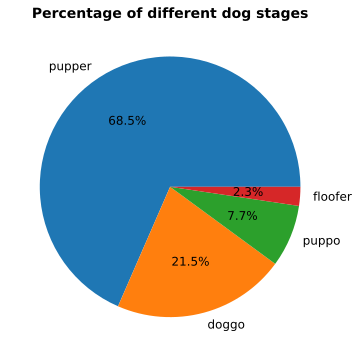

In [418]:
#creates the pie chart
stages = twitter_archive_master.query('dog_stage != "None"').dog_stage.value_counts()
stages.plot.pie(figsize=(6,6), autopct='%1.1f%%', textprops={'fontsize': 12})
#sets title and labels
plt.title('Percentage of different dog stages', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.savefig('stages_chart.svg', format='svg')
plt.show();

>**Note:**
>
>This pie chart represents the percentage of each dog's stage in the dataframe, considering only the stages different from "None". It is possible to notice that the majority of the classified dogs in this dataframe are puppers, with 68.5%, followed by doggo, with 21.5%.

### 6.2.2. Insight 2

In [419]:
#groups the data by "p1" and finds the sum of "favorite_count", sorted in descending order
favorite_breeds = twitter_archive_master.groupby('p1').favorite_count.sum().sort_values(ascending=False) / 1000000
#selects the first 10 results
favorite_breeds = favorite_breeds[0:10]
favorite_breeds

p1
Golden Retriever      1.439270
Labrador Retriever    0.927361
Pembroke              0.883509
Chihuahua             0.614347
Samoyed               0.459106
French Bulldog        0.418695
Chow                  0.362607
Pug                   0.278550
Cocker Spaniel        0.275172
Pomeranian            0.267007
Name: favorite_count, dtype: float64

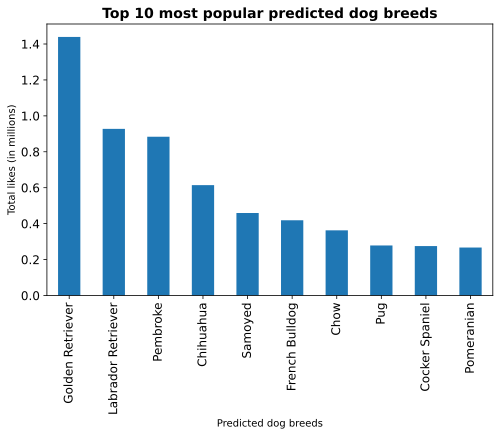

In [427]:
#sets bar chart size (width, height)
plt.figure(figsize=(8, 5))
#plots the bar chart
ax = favorite_breeds.plot.bar(fontsize=12)
#sets title and labels
ax.set_title("Top 10 most popular predicted dog breeds", fontsize=14, fontweight='bold')
ax.set_ylabel('Total likes (in millions)', fontsize=10)
ax.set_xlabel("Predicted dog breeds", fontsize=10)
plt.savefig('pop_breeds_chart.svg', format='svg', bbox_inches='tight')
plt.show();

>**Note:**
>
>This bar chart represents the predicted dog breeds with the top ten highest total of "likes". It is possible to notice that the dogs predicted as Golden Retriever recivied the highest amount of "likes", with 1.4 million total, followed by Labrador Retriever, with 0.9 million, and Pembroke, with  0.8 million.

### 6.2.3. Insight 3

In [421]:
#groups the data by "p1" and finds the sum of "retweet_count", sorted in descending order
retweeted_breeds = twitter_archive_master.groupby('p1').retweet_count.sum().sort_values(ascending=False) / 1000
#selects the first 10 results
retweeted_breeds = retweeted_breeds[0:10]
retweeted_breeds

p1
Golden Retriever      398.608
Labrador Retriever    287.986
Pembroke              233.102
Chihuahua             188.960
Samoyed               145.688
French Bulldog        101.096
Chow                   98.386
Pomeranian             88.293
Cocker Spaniel         83.009
Eskimo Dog             81.843
Name: retweet_count, dtype: float64

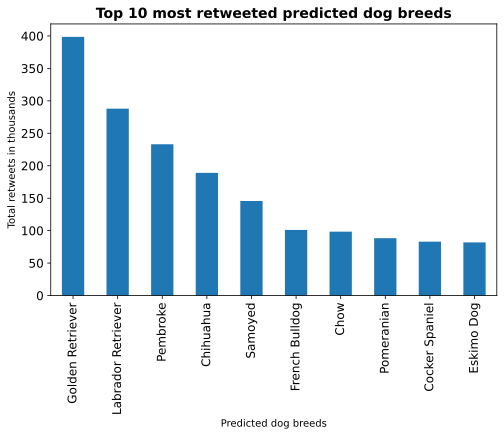

In [428]:
#sets bar chart size (width, height)
plt.figure(figsize=(8, 5))
#plots the bar chart
ax = retweeted_breeds.plot.bar(fontsize=12)
#sets title and labels
ax.set_title("Top 10 most retweeted predicted dog breeds", fontsize=14, fontweight='bold')
ax.set_ylabel('Total retweets in thousands', fontsize=10)
ax.set_xlabel("Predicted dog breeds", fontsize=10)
plt.savefig('rt_breeds_chart.svg', format='svg', bbox_inches='tight')
plt.show();

>**Note:**
>
> This bar chart represents the predicted dog breeds with the top ten highest total of retweets. It is possible to notice that the dogs predicted as Golden Retriever were the most retweeted, with 398 thousands of retweets, also followed by Labrador Retriever, 287 thousands, and Pembroke, 233 thousands.

<a id='references'></a>
## 7. References

- https://knowledge.udacity.com/questions/242616
- https://knowledge.udacity.com/questions/332090
- https://knowledge.udacity.com/questions/127161
- https://knowledge.udacity.com/questions/386360
- https://knowledge.udacity.com/questions/212738
- https://knowledge.udacity.com/questions/455113
- https://knowledge.udacity.com/questions/389519
- https://knowledge.udacity.com/questions/287523
- https://stackoverflow.com/questions/54611750/dataframe-replace-underscore-with-blank-not-working
- https://www.ti-enxame.com/pt/python/compare-duas-colunas-usando-pandas/1050144517/
- https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
- https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json
- https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python
- https://stackoverflow.com/questions/30765455/why-is-my-plt-savefig-is-not-working
- https://stackoverflow.com/questions/17582137/ipython-notebook-svg-figures-by-default
- https://stackoverflow.com/questions/36622237/jupyter-notebook-inline-plots-as-svg/53719336
-https://youtu.be/C8MT-A7Mvk4